## Supervised Learning
## Project: Finding Donors for *CharityML*

In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

### Trying out other way of reading the data

In [1]:
# Importbasic libraries
import numpy as np
import pandas as pd
from time import time

#better visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Allows the use of display() for DataFrames
from IPython.display import display

# Import supplementary visualization code visuals.py
import visuals as vs


from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, roc_auc_score, accuracy_score, make_scorer
#the three relevant models 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
# Import functionality for cloning a model
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone

#### In this work, Python 3.7.3 was used

In [2]:
data = pd.read_csv('census.csv',
           sep=';')

In [3]:
# Pretty display for notebooks
%matplotlib inline

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [4]:
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [5]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data.loc[data['income'] == '>50K'])

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data.loc[data['income'] == '<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = "{:.1%}".format(n_greater_50k/n_records)

print(greater_percent)
# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent, ))

24.8%
Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.8%%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

C:\Users\e9727\OneDrive - Sixt GmbH & Co. Autovermietung KG\Desktop\Learning and Development\Udacity_intro_to_ML\Project_1\visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


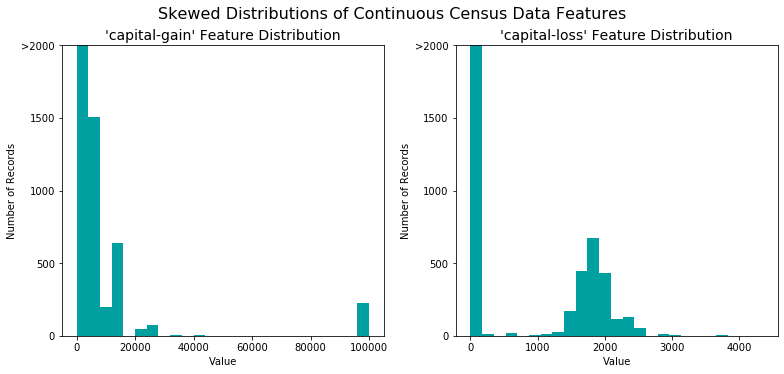

In [6]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

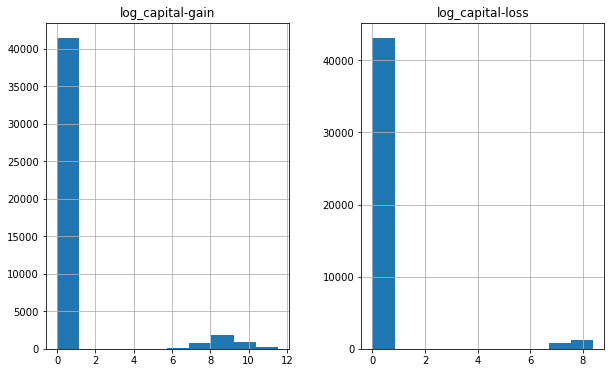

In [7]:
## added +1 to the log to be able to handle 0 values in the capital-gain column
## these two new columns were created just for testing the understanding of 
## the functions below, and are not included in the features_raw either way

data['log_capital-gain'] = data['capital-gain'].apply(lambda x: np.log(x + 1))
data['log_capital-loss'] = data['capital-loss'].apply(lambda x: np.log(x + 1))
data[['log_capital-gain','log_capital-loss']].hist(figsize = (10, 6));

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

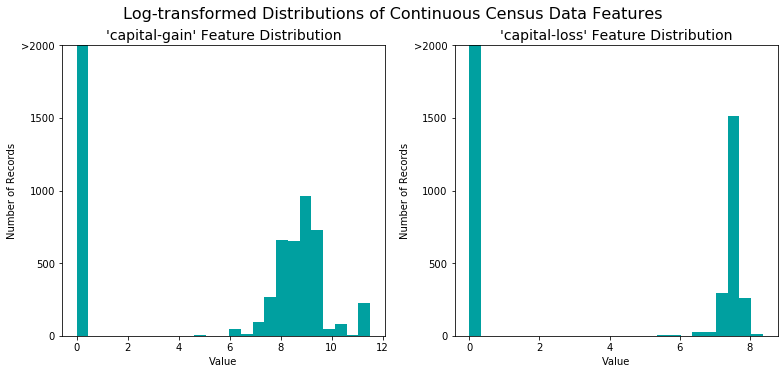

In [8]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [9]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler
## most of the sklearn functions require numpy inputs


# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [10]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.map({'<=50K':0,'>50K':1 })

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [11]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

### Key info: model always predicted an individual makes >50k

In [12]:
true_positives = np.sum(income)
false_positives = income.count() - true_positives
true_negatives = 0
false_negatives = 0
all_points = true_positives + false_positives + true_negatives + false_negatives
print('TP:', true_positives, 'FP:', false_positives)

TP: 11208 FP: 34014


In [13]:
## cross-checking results of TP and FP
print(income.value_counts());
print(len(income));

0    34014
1    11208
Name: income, dtype: int64
45222


In [14]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''

# TODO: Calculate accuracy, precision and recall
accuracy = true_positives / all_points
recall = true_positives / (true_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + (beta**2)) * ( (precision * recall)/ ((beta**2 * precision) + recall) )

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

In [15]:
features_final.corr().abs().head(5)

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
age,1.000000,0.037623,0.122068,0.055331,0.101992,0.054823,0.063694,0.209763,0.106698,0.156174,...,0.005608,0.004745,0.011859,0.000236,0.007639,0.000654,0.002844,0.012082,0.014403,0.003294
education-num,0.037623,1.000000,0.129347,0.078967,0.146206,0.054970,0.096524,0.164869,0.081174,0.010568,...,0.047135,0.043631,0.001084,0.016338,0.046099,0.007379,0.010147,0.132242,0.010287,0.006425
capital-gain,0.122068,0.129347,1.000000,0.066899,0.086098,0.013721,0.003846,0.049817,0.075127,0.020597,...,0.005011,0.008527,0.006317,0.005113,0.003316,0.004457,0.004192,0.018919,0.002913,0.006782
capital-loss,0.055331,0.078967,0.066899,1.000000,0.051587,0.010272,0.011064,0.031218,0.032621,0.013372,...,0.008254,0.001323,0.004686,0.002767,0.001343,0.001645,0.003502,0.012821,0.000175,0.005025
hours-per-week,0.101992,0.146206,0.086098,0.051587,1.000000,0.007387,0.001639,0.094559,0.123668,0.088012,...,0.004322,0.010713,0.001422,0.015420,0.000233,0.010315,0.004179,0.010228,0.008040,0.001354


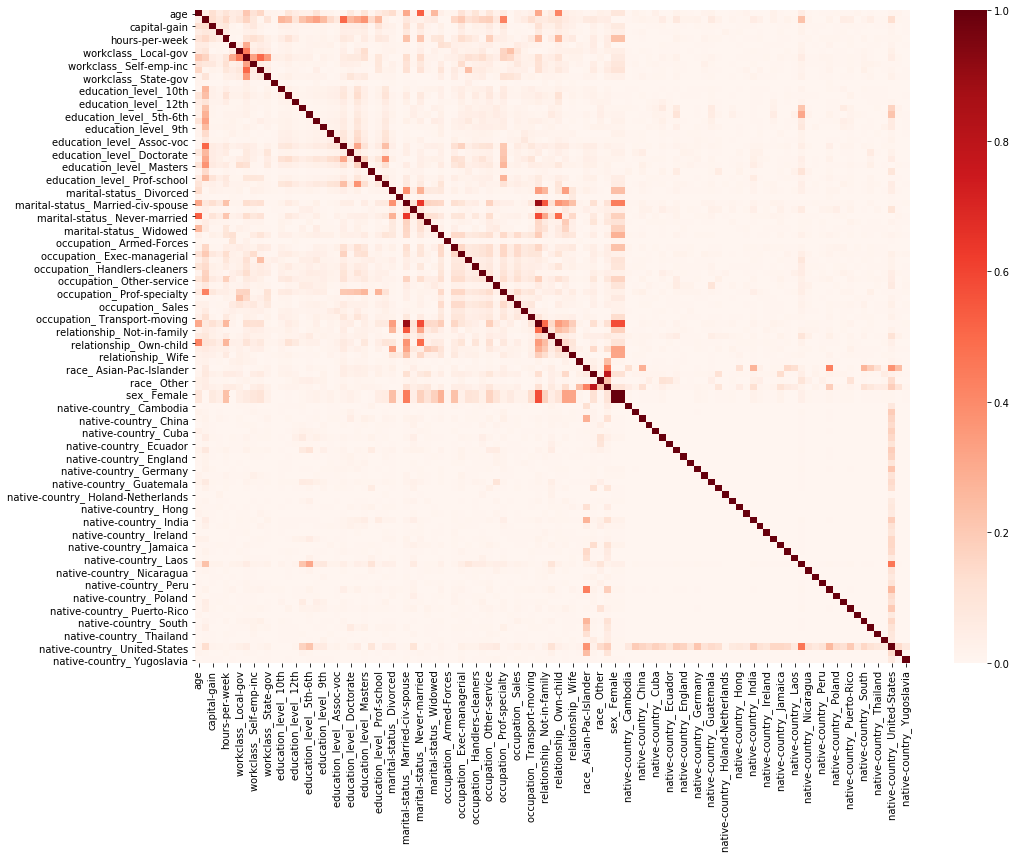

In [16]:
## We see that the the second half of the heatmap is mostly bright, closer to 0 so we can simplify the heatmap removing 
## the native-country feature for simplification purposes
plt.figure(figsize = (16,12))
sns.heatmap(features_final.corr().abs(),
           cmap = 'Reds',
           vmin=0,
           vmax=1)

In [17]:
## As we can see above, on th eright side of the graph
## the only correlations are between race and between the different native-country subcategorizations which are negative by logic 
data['native-country'].value_counts()[:10]

 United-States    41292
 Mexico             903
 Philippines        283
 Germany            193
 Puerto-Rico        175
 Canada             163
 El-Salvador        147
 India              147
 Cuba               133
 England            119
Name: native-country, dtype: int64

In [18]:
#### Simplifying the features selection ('removing native-country')
features_rec_1 = [x for x in features_final if 'native-country' not in x]

print(features_final.shape[1], ' columns including native-country columns')
print(len(features_rec_1), 'columns left excluding native-country')

103  columns including native-country columns
62 columns left excluding native-country


In [19]:
## creating a correlation mapping object that can be used in future heatmaps
corr_mapping = features_final[features_rec_1].corr().abs();
mask = np.triu(np.ones_like(corr_mapping, dtype=np.bool))

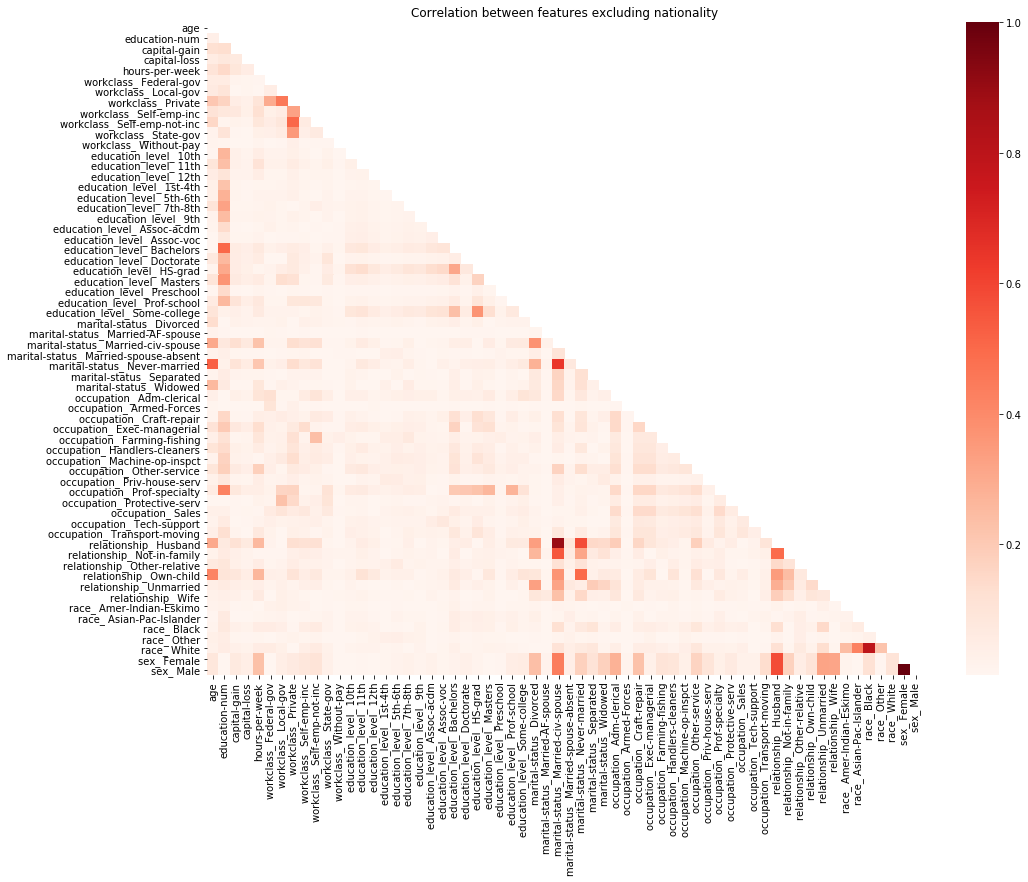

In [20]:
#draw up to one diagonal of the heatmap and remove negatively correlated pairs for simplicity
plt.figure(figsize = (16, 12));
plt.title('Correlation between features excluding nationality')

sns.heatmap(corr_mapping, cmap = 'Reds',
           cbar = True,
           mask = mask);

### Simple check for multicollinearity of top 10 explanatory variables

In [21]:
rec_features = features_final[features_rec_1]

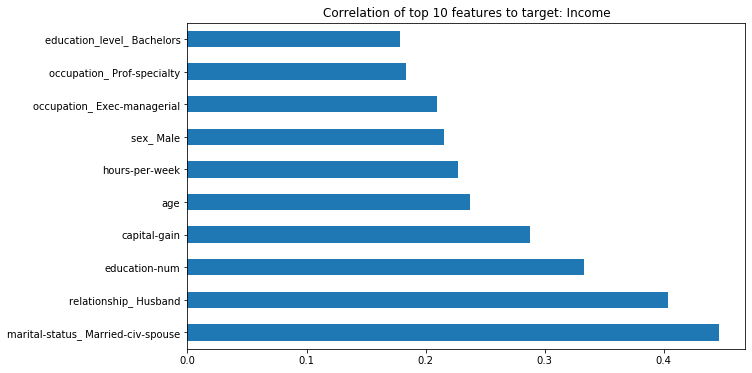

In [41]:
## Figuring out how the top features correlate to income
rec_features.corrwith(income).sort_values(ascending = False)[:10].plot(kind = 'barh', 
           title = 'Correlation of top 10 features to target: Income',
           figsize = (10,6));

In [49]:
features_to_check= list(rec_features.corrwith(income).sort_values(ascending = False)[:10].index)

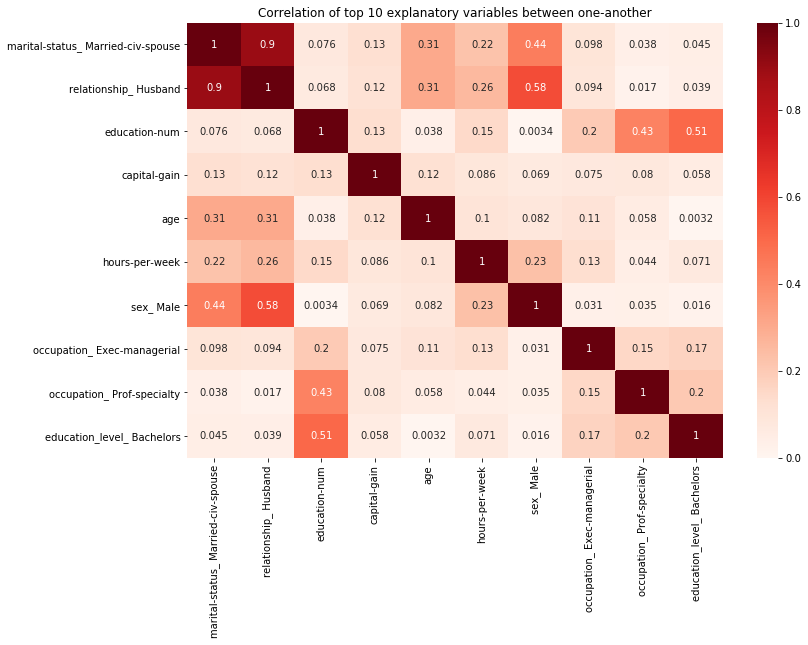

In [51]:
plt.figure(figsize = (12, 8))
plt.title('Correlation of top 10 explanatory variables between one-another')
sns.heatmap(features_final[features_to_check].corr().abs(),
           vmin = 0,
           vmax = 1,
           cmap = 'Reds',
           annot = True);

**Answer: **

### I have focused on the alogirthms incorporating the decision tree as they are the most intuitive to me. Due to the issues that a Decision Tree by itself can have with overfitting, I would not choose it as a stand-alone model for this exercise.  However, we can work with decision trees as a base model accompanied by other boosting methods such as the ones to be described below AdaBoost and Gradient Boost. In the practice of nowadays, decision trees are seldom used as a standalone solution. The solutions I am considering then are ensemble methods as AdaBoost, RandomForest and GradientBoosting.


## 1.0 Decision Trees

### Due to the increased visibility they quickly offer to one's dataset, decision trees can be applied to have a quick identification of factors leading to a specific outcome. Decision trees can be applied very easily in for exploratory purposes as opposed to pure inferential. Data mining products can stem from applications of decision trees on data.

### 1.0.1     Two fields where Decision trees have been used largely in are image processing such as outdoor image segmentation and radiology, as well as process optimization in manufacturing and production (Kennedy, 1993). 

### 1.0.2 The strengths of the Decision trees are the following: 

#### a) A decision tree model can be explained intuitively in layman terms thanks to its' tree structure and human readable classification rules through the creation of .dot files convertable to images.

#### b) Can be used for both regression and classification problems. It can accept both categorical and continuous attributes as well as missing values. This reduces the manual labour effort in pre-processing and normalizing data.

### 1.0.3 Weaknesses of the Decision tree models are the following: 

#### a) depending on the hyperparamters we specify for the decision tree such as max_depth and min_samples_split, we could be easily overfitting the data by having a small min_samples_split and a very high tree depth. The more decisions there are in a tree, the less accurate the model can prove on a testing dataset. Finding the right-sized trees can be a difficult challenge. Where there are ways to go around this problem as cost-complexity pruning (Breiman et al., 1984), this is outside of the realm of this submission. 

#### b) Individual decision trees of one dataset mays have high variance from one-another so it is recommended that they are used in combination

#### c) Stirring the construction of a decision tree for a specific problem/question may require a thorough understanding of the problem itself as the predictory power of the decision tree may not imply causation rather a nice-looking split
        


## 1.1 Ensemble Methods (Adaboost, Random Forest and Gradient Boosting) - AdaBoost

### 1.1.1 Boosting algorithms such as Adaboost are currently one of the best performing supervised classifier learning algorithms (Oza et al., 2008). One of the key uses of AdaBoost algorithms despite medical applications has been in facial recognition softwares (Wang et al., 2004; Owusu et al., 2014) 

### 1.1.2: Advantages and disadvantages of Adaboost

####  a) One of the main advantages of ensemble methods is that due to a decreased bias by bootstraping and boosting the models, there is no overfitting. This proves advantageous for the given dataset we have, from which we would like to have several perspectives on. 
    
#### b) Conceptually, it is also a simple algorithm and generally resistant to overfitting thanks to its reiterations from  perspective of different points provided there is not much noise in the data

#### c) One of the disadvantages of Adaboost is that it can be sensitive to noisy data or outliers


## 1.2 Gradient Boosting

### 1.2.1 there is evidence that Gradient Boosting has been used by search engines like Google and Yandex. 

### 1.2.2 Advantages of Gradient Boosted Trees are

#### a) it can handle mising data and requires no data pre-processing, so works well with both categorical and numerical values
#### b) it can be optimized extensively and is very flexible
#### c) it often provides a very good predictive accuracy (advantageus for our case)


### 1.2.3 Disadvantages: 
    
#### a) As the boosting will continue improving seeking error-minimization, outliers can be emphasized and cause overfitting. It      is recommended to use cross-validation to neutralize this effect. 
#### b) It is computationally very expensive, it takes a lot of time to train, but on the other hand it takes less time to             predict on testing data. 
#### c) The extensive number of hyperparameters may require a large grid search during tuning 
#### d) The presence of several decision trees makes it more difficult to interpret than other simpler algorithms as linear             regressions, Naive Bayes or standalone decision trees

## 1.3 Random Forest

### 1.3.1 Application of the Random Forest alogirthm can be found in genetics, biotechnology and bioinformatics. 

### 1.3.2 Advantages: 

#### a) Similar to Gradient Boosting, a Random Forest can solve both classification and regression issues

#### b) Is effective in estimating missing data and can be accurate even if a substantial part of the data is missing or is trained only on a small subset of data

### 1.3.3 Disadvantages: 

#### a) The algorithm is based on bootstrap sampling, so it could also not be sucessful in identifying rare predictors

#### b) Choosing the number of trees to apply can be an arbitrary choice and overfitting can easily occur








### Sources: 
https://acadgild.com/blog/naive-bayesian-model
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Murthy, Sreerama K. "Automatic construction of decision trees from data: A multi-disciplinary survey." Data mining and knowledge discovery 2.4 (1998): 345-389.

Wang, Yubo, et al. "Real time facial expression recognition with adaboost." Proceedings of the 17th International Conference on Pattern Recognition, 2004. ICPR 2004.. Vol. 3. IEEE, 2004.

Cao Ying, Miao Qi-Guang, Liu Jia-Chen, Gao Lin. Advance and prospects of AdaBoost algorithm. Acta Automatica Sinica, 2013, 39(6): 745–75

Oza, Nikunj C., and Kagan Tumer. "Classifier ensembles: Select real-world applications." Information Fusion 9.1 (2008): 4-20.

Davis M. Kennedy. Decision tree bears fruit. Products Finishing, 57(10):66, July 1993.

R. Caruana, A. Niculescu-Mizil, An empirical comparison of supervised learning algorithms, in: International Conference
on Machine Learning, 2006, pp. 161–168.

Mohri, Mehryar, Afshin Rostamizadeh, and Ameet Talwalkar. Foundations of machine learning. MIT press, 2018.

https://medium.com/@dhiraj8899/top-5-advantages-and-disadvantages-of-decision-tree-algorithm-428ebd199d9a

http://uc-r.github.io/gbm_regression

https://www.slideshare.net/PyData/gradient-boosted-regression-trees-in-scikit-learn-gilles-louppe

### Simple statistics on capital gains and losses by target outcome

In [25]:
temp_df = data[['capital-gain', 'capital-loss', 'income']].groupby('income').agg({'capital-gain':['mean', 'sum'],
                                                                                  'capital-loss': ['mean', 'sum']})
temp_df['capital-Δ', 'sum Δ'] = temp_df['capital-gain', 'sum'] - temp_df['capital-loss', 'sum']
temp_df['capital-Δ', 'mean Δ'] = temp_df['capital-gain', 'mean'] - temp_df['capital-loss', 'mean']
temp_df['capital-Δ', 'Δ (Gain-Loss)/Loss in %'] = (temp_df['capital-Δ', 'sum Δ']/temp_df['capital-loss', 'sum']).apply("{:.1%}".format)
display(temp_df)
del temp_df

capital-gain           capital-loss          capital-Δ               \
               mean       sum         mean      sum     sum Δ       mean Δ   
income                                                                       
<=50K    149.023402   5068882    54.032428  1837859   3231023    94.990974   
>50K    3991.791667  44740001   193.487063  2168603  42571398  3798.304604   

                                
       Δ (Gain-Loss)/Loss in %  
income                          
<=50K                   175.8%  
>50K                   1963.1%

### Is there noise that would interrupt our data from fitting properly?

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [26]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
#     learner = learner()
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    ## Looking at the default parameters on the last training iteration
    if sample_size == len(y_train):
        print(learner)
        
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta = 0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [ ]:
help(AdaBoostClassifier.fit)

In [ ]:
help(fbeta_score)

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)
AdaBoostClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fractio

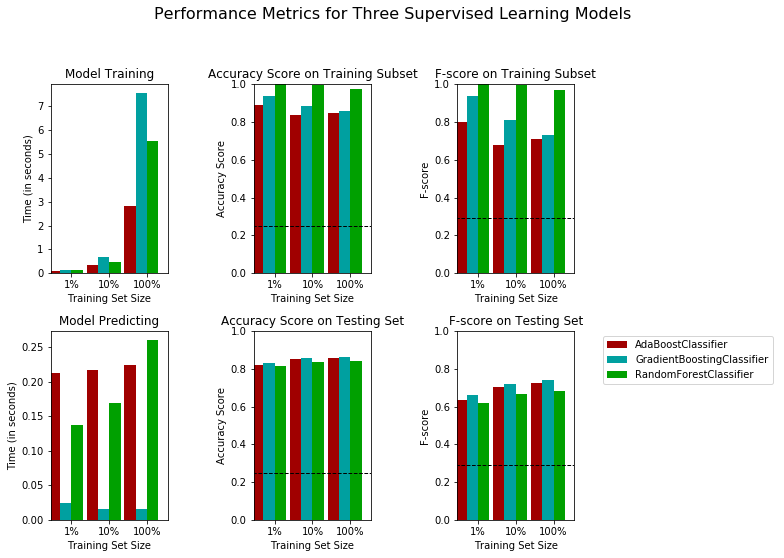

In [27]:
# TODO: Import the three supervised learning models from sklearn

# TODO: Initialize the three models

clf_A = AdaBoostClassifier(random_state = 42)
clf_B = GradientBoostingClassifier(random_state = 42)
clf_C = RandomForestClassifier(random_state = 42)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.1 * samples_100)
samples_1 = int(0.01 * samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [ ]:
help(GradientBoostingClassifier)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [ ]:
help(make_scorer)

In [28]:
# TODO: Initialize the classifier

start = time()

clf = GradientBoostingClassifier()

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'learning_rate': [0.1, 0.2], ## as there is no single variable with a high correlation to income, we are conservative in the learning rate we have set 
              'n_estimators': [150, 300], ## number of estimators is at default 100 so if we are interested in better performance we can select more
              'min_samples_split': [5, 20, 35], 
              'min_samples_leaf': [2, 10],
             'max_depth':[2, 3, 6]} 

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring = scorer, n_jobs = 3)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

end = time()
print('This took ', (end-start)/60, 'minutes to run')

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

This took  38.33103380203247 minutes to run
Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8693
Final F-score on the testing data: 0.7498


In [31]:
best_clf

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=35,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |      0.8630       |   0.8693        |
| F-score        |      0.7395       |   0.7498       |


**Answer: **
with a learning rate of 0.2 and a min of samples per leaf of 10, a min. samples split of 35 and 150 instead of 100 estimators, the model's accuarcy could be increased only by a little from 86.3 to 86.9% and its F-score by 1% from 73.95% to 74.98%. This is a very small improvement, yet it can be beneficial when considering that accuarcy is important in our model

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

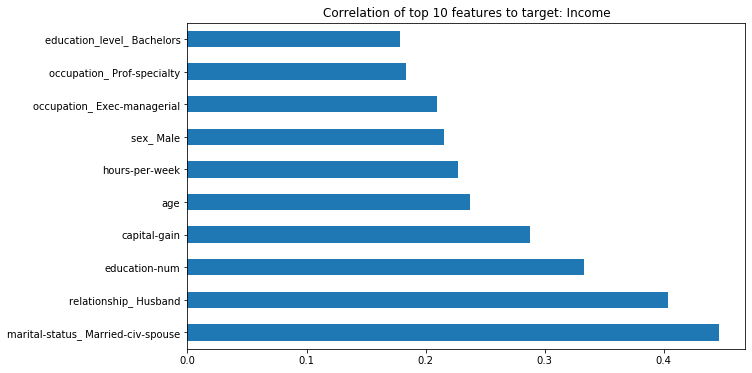

In [36]:
## Figuring out how the top features correlate to income
rec_features.corrwith(income).sort_values(ascending = False)[:10].plot(kind = 'barh', 
           title = 'Correlation of top 10 features to target: Income',
           figsize = (10,6));

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

In [32]:
help(GradientBoostingClassifier.feature_importances_)

Help on property:

    Return the feature importances (the higher, the more important the
       feature).
    
    Returns
    -------
    feature_importances_ : array, shape (n_features,)
        The values of this array sum to 1, unless all trees are single node
        trees consisting of only the root node, in which case it will be an
        array of zeros.



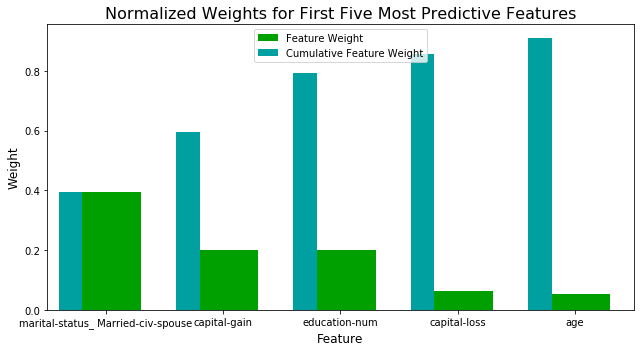

In [35]:
# TODO: Import a supervised learning model that has 'feature_importances_'

classifier_model = GradientBoostingClassifier()

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = classifier_model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

My estimations were mostly correct, but my ranking of them was not, it seems that age and education-num has a higher weight as a feature. The reason to assigning the feature weight is still foreign to me. As expected both capital-losses and capital gains enter the picture which was my prediction as well. 

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [38]:
# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8693
F-score on testing data: 0.7498

Final Model trained on reduced data
------
Accuracy on testing data: 0.8495
F-score on testing data: 0.7024


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**
the F-score in the reduced testing data is the score that changes the most, going down from 75 to 70% which can make a large difference in a model with many examples coming in. However, in terms of accuracy which is what we are mostly interested in, the reduced data paints a very similar picture of the accuracy of the model at a fraction of the time. So, yes I would consider using substantially less features

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## Before You Submit
You will also need run the following in order to convert the Jupyter notebook into HTML, so that your submission will include both files.

In [53]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook project_finding_donors.ipynb to html',
 '[NbConvertApp] Writing 1104363 bytes to project_finding_donors.html']